In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kagglehub
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")
print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:04<00:00, 36.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 77% 126M/163M [00:00<00:00, 1.32GB/s]
100% 163M/163M [00:00<00:00, 1.20GB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3273.jpg', 'with_mask_2733.jpg', 'with_mask_1258.jpg', 'with_mask_2552.jpg', 'with_mask_1663.jpg']
['with_mask_1522.jpg', 'with_mask_3353.jpg', 'with_mask_1373.jpg', 'with_mask_2418.jpg', 'with_mask_2779.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3041.jpg', 'without_mask_3520.jpg', 'without_mask_2116.jpg', 'without_mask_2696.jpg', 'without_mask_1253.jpg']
['without_mask_2336.jpg', 'without_mask_2324.jpg', 'without_mask_1509.jpg', 'without_mask_1883.jpg', 'without_mask_2228.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


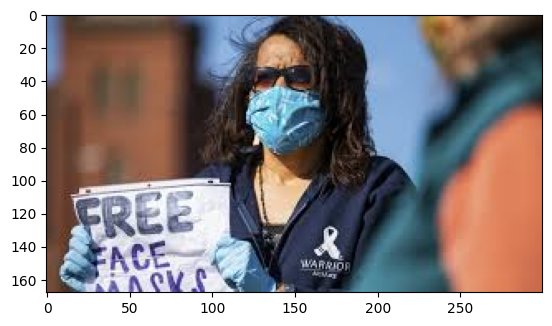

In [16]:
img = mpimg.imread('/content/data/with_mask/with_mask_2733.jpg')
imgplot = plt.imshow(img)
plt.show()

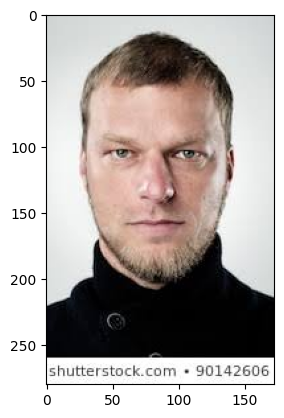

In [18]:
img = mpimg.imread('/content/data/without_mask/without_mask_2346.jpg')
imgplot = plt.imshow(img)
plt.show()

In [21]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[ 39,  78,  85],
        [ 39,  77,  85],
        [ 38,  78,  85],
        ...,
        [ 31,  38,  21],
        [ 31,  39,  19],
        [ 33,  41,  18]],

       [[ 36,  79,  88],
        [ 36,  79,  87],
        [ 35,  78,  86],
        ...,
        [ 31,  38,  20],
        [ 29,  36,  18],
        [ 30,  37,  21]],

       [[ 33,  80,  90],
        [ 34,  80,  90],
        [ 34,  78,  88],
        ...,
        [ 31,  39,  21],
        [ 28,  35,  18],
        [ 28,  36,  21]],

       ...,

       [[ 43,  80, 209],
        [ 33,  65, 193],
        [ 33,  46, 146],
        ...,
        [107,  53,  27],
        [ 98,  48,  22],
        [ 39,  29,  18]],

       [[ 80,  77, 185],
        [ 78,  62, 126],
        [ 65,  43,  63],
        ...,
        [109,  49,  27],
        [103,  46,  20],
        [ 50,  33,  18]],

       [[ 98,  75, 140],
        [ 95,  61,  65],
        [ 86,  53,  38],
        ...,
        [110,  48,  27],
        [109,  44,  19],
        [ 72,  37,  18]]], dtype=uint8)
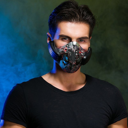

In [26]:
data[0]

In [27]:
type(data[0])

numpy.ndarray

In [28]:
data[0].shape

(128, 128, 3)

In [30]:
X = np.array(data)
Y = np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
type(Y)

numpy.ndarray

In [33]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [34]:
print(Y)

[1 1 1 ... 0 0 0]


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [37]:
x_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[184, 141, 102],
        [184, 142, 103],
        [172, 131,  93],
        ...,
        [ 37,  37,  37],
        [ 34,  34,  34],
        [ 28,  28,  28]],

       [[178, 138,  98],
        [179, 138,  99],
        [159, 116,  79],
        ...,
        [ 37,  37,  37],
        [ 30,  29,  29],
        [ 28,  27,  27]],

       [[171, 139,  98],
        [172, 135,  95],
        [154, 110,  73],
        ...,
        [ 39,  37,  38],
        [ 25,  23,  24],
        [ 29,  27,  28]]], dtype=uint8)
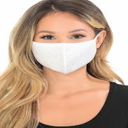

In [38]:
X_train[0]

In [40]:
x_train_scaled[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.72156863, 0.55294118, 0.4       ],
        [0.72156863, 0.55686275, 0.40392157],
        [0.6745098 , 0

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [46]:
history = model.fit(x_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - acc: 0.6960 - loss: 0.6644 - val_acc: 0.8810 - val_loss: 0.2700
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8760 - loss: 0.3128 - val_acc: 0.9025 - val_loss: 0.2262
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8994 - loss: 0.2545 - val_acc: 0.9256 - val_loss: 0.1955
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9286 - loss: 0.1883 - val_acc: 0.9273 - val_loss: 0.1911
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9329 - loss: 0.1709 - val_acc: 0.9190 - val_loss: 0.2194


In [47]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9066 - loss: 0.2079
Test Accuracy = 0.9166114926338196


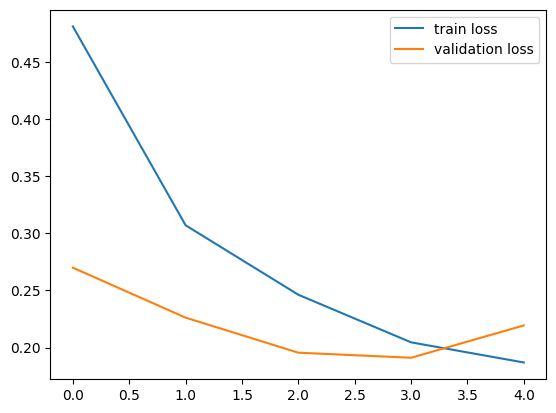

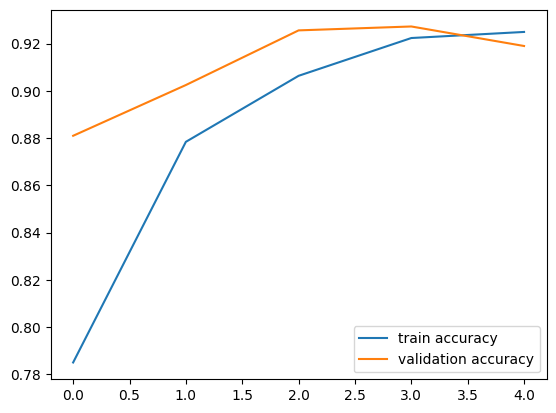

In [48]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/TEST1.jpg


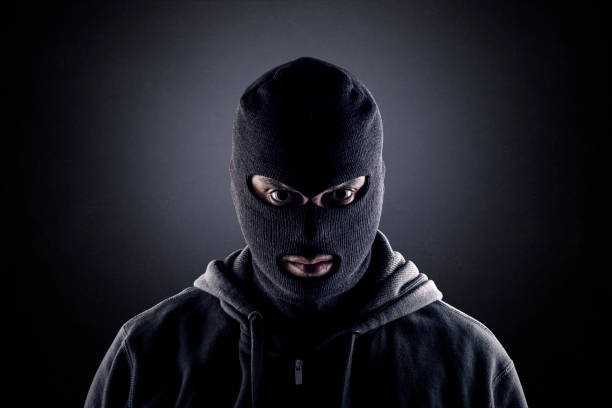

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.10715143 0.82213545]]
1
The person in the image is wearing a mask


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/TEST2.jpg


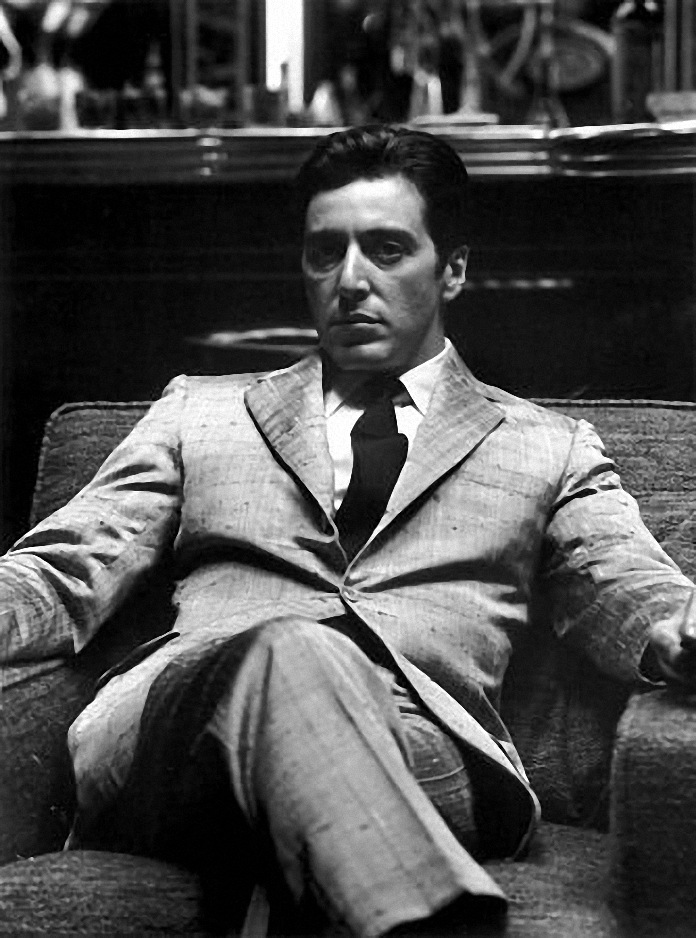

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.01323685 0.9641124 ]]
1
The person in the image is not wearing a mask


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [55]:
import gradio as gr
import numpy as np
import tensorflow as tf

In [56]:
def predict(image):
    image = image.resize((28, 28))  # Adjust size as needed
    image = np.array(image) / 255.0
    image = image.reshape(1, 28, 28, 1)  # Reshape based on your model
    prediction = model.predict(image)
    return f"Predicted Digit: {np.argmax(prediction)}"

In [59]:
interface = gr.Interface(fn=predict,
                         inputs=gr.Image(image_mode='L'),
                         outputs="text")

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d7ad21d9600358e5a7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
